In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns

from statsmodels.stats.stattools import durbin_watson

sns.set_theme()

In [2]:
aapl_df = yf.download('AAPL',
                        start= '2020-01-01',
                        end = '2025-02-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

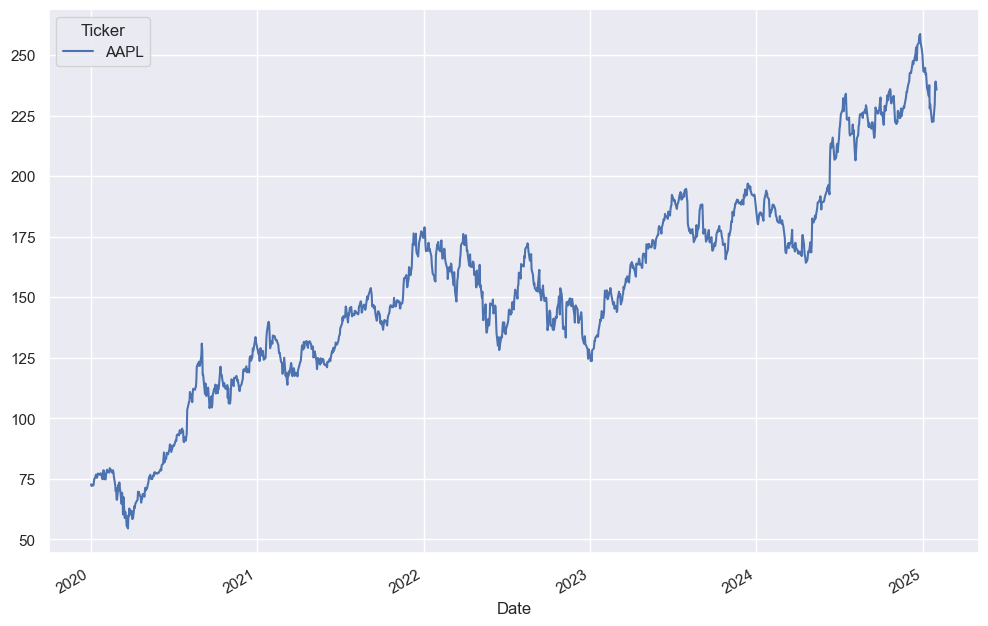

In [3]:
aapl_df['Close'].plot(kind = 'line', figsize = (12, 8))

In [4]:
new_aapl = aapl_df['Close']
new_aapl['log_returns'] = np.log(new_aapl['AAPL'] / new_aapl['AAPL'].shift(1))
new_aapl.dropna(inplace = True)

<positron-console-cell-4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Axes: xlabel='Date'>

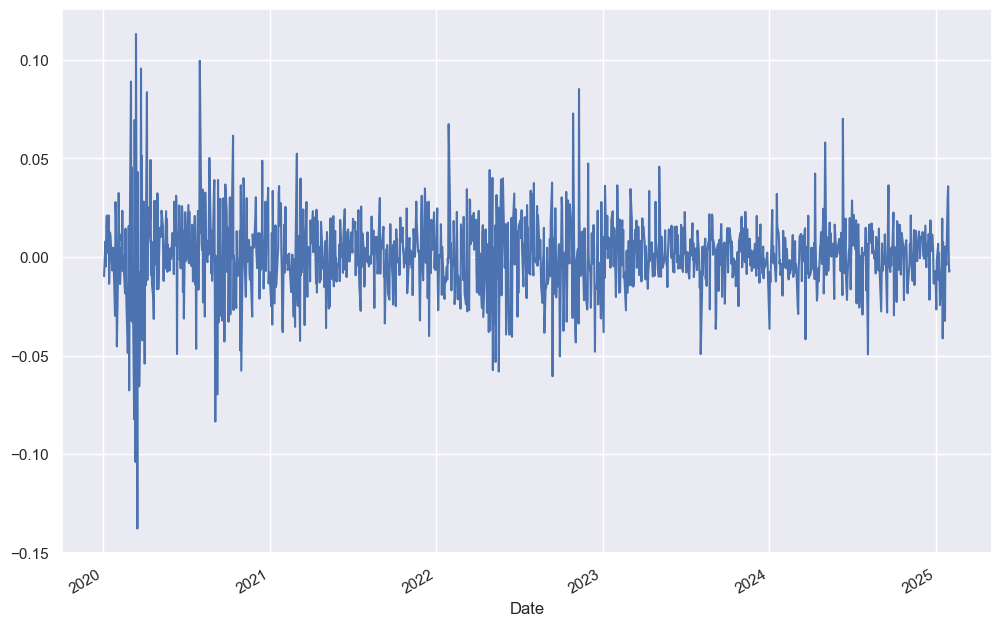

In [5]:
new_aapl['log_returns'].plot(kind = 'line', figsize = (12, 8))

<Axes: ylabel='Frequency'>

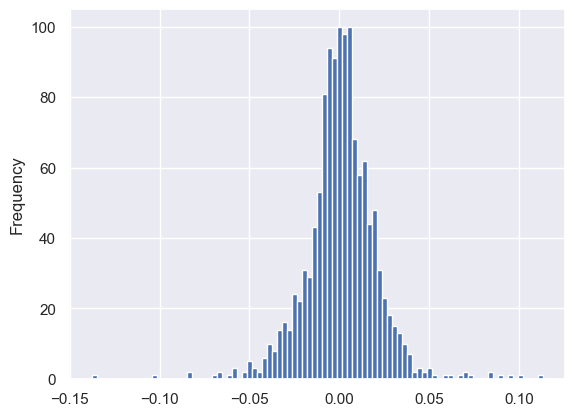

In [6]:
new_aapl['log_returns'].plot(kind = 'hist', bins = 90)

In [7]:
# Lista de tickers de los activos
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]

# Descargar datos históricos para el rango de fechas deseado
data = yf.download(tickers, start="2022-01-01", end="2023-01-01", group_by='ticker', threads=True)

# Mostrar las primeras filas de los datos
print(data.head())


[*********************100%***********************]  5 of 5 completed

Ticker            AMZN                                                     GOOGL                                                ...        MSFT                                                      AAPL  \
Price             Open        High         Low       Close    Volume        Open        High         Low       Close    Volume  ...        Open        High         Low       Close    Volume        Open   
Date                                                                                                                            ...                                                                         
2022-01-03  167.550003  170.703506  166.160507  170.404495  63520000  144.531066  145.324197  143.193918  144.467804  28646000  ...  326.218464  328.796299  320.800127  325.634796  28865100  174.771820   
2022-01-04  170.438004  171.399994  166.349503  167.522003  70726000  144.870821  145.955892  143.197398  143.877930  28400000  ...  325.712523  326.072473  317.239706  320.051025 

In [13]:
data['MSFT','Open']

Date
2022-01-03    326.218464
2022-01-04    325.712523
2022-01-05    316.986762
2022-01-06    304.622875
2022-01-07    305.595729
                 ...    
2022-12-23    231.832877
2022-12-27    234.375966
2022-12-28    232.598759
2022-12-29    231.381215
2022-12-30    233.894872
Name: (MSFT, Open), Length: 251, dtype: float64

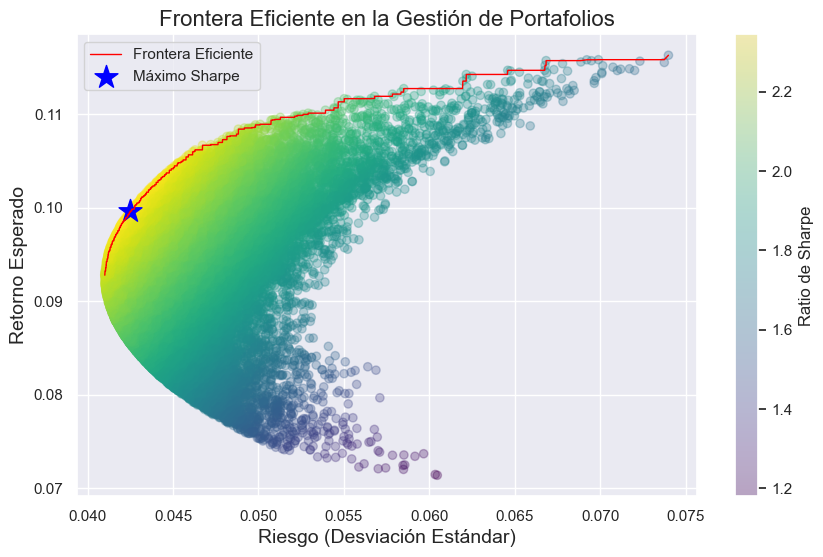

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de los activos
assets = ['Activo A', 'Activo B', 'Activo C', 'Activo D']
exp_returns = np.array([0.12, 0.10, 0.08, 0.07])
cov_matrix = np.array([
    [0.0064, 0.0008, 0.0011, 0.0009],
    [0.0008, 0.0025, 0.0012, 0.0010],
    [0.0011, 0.0012, 0.0036, 0.0013],
    [0.0009, 0.0010, 0.0013, 0.0040]
])

# Número de simulaciones de portafolios
n_portfolios = 50000

# Matriz para almacenar [riesgo, retorno, ratio de Sharpe]
results = np.zeros((3, n_portfolios))
weights_record = []

for i in range(n_portfolios):
    # Generar pesos aleatorios y normalizarlos para que sumen 1
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Calcular retorno y riesgo del portafolio
    port_return = np.dot(weights, exp_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    results[0, i] = port_std
    results[1, i] = port_return
    # Se asume tasa libre de riesgo = 0 para simplificar
    results[2, i] = port_return / port_std

# Identificar el portafolio con el mayor ratio de Sharpe
max_sharpe_idx = np.argmax(results[2])
max_sharpe_std = results[0, max_sharpe_idx]
max_sharpe_ret = results[1, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Ordenar portafolios por riesgo para calcular la frontera eficiente
sorted_indices = np.argsort(results[0])
sorted_risks = results[0, sorted_indices]
sorted_returns = results[1, sorted_indices]

# Calcular el máximo acumulado de retornos, que aproxima la frontera eficiente
efficient_returns = np.maximum.accumulate(sorted_returns)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sc = plt.scatter(results[0], results[1], c=results[2], cmap='viridis', alpha=0.3)
plt.plot(sorted_risks, efficient_returns, color='red', linewidth=1, label='Frontera Eficiente')
plt.scatter(max_sharpe_std, max_sharpe_ret, color='blue', marker='*', s=300, label='Máximo Sharpe')
plt.title('Frontera Eficiente en la Gestión de Portafolios', fontsize=16)
plt.xlabel('Riesgo (Desviación Estándar)', fontsize=14)
plt.ylabel('Retorno Esperado', fontsize=14)
plt.colorbar(sc, label='Ratio de Sharpe')
plt.legend()
plt.grid(True)
plt.show()
